# Projeto 15: Geração de imagens com GANs

- Código adaptado da documentação: https://www.tensorflow.org/beta/tutorials/generative/dcgan




# Etapa 1: Importação das bibliotecas

In [1]:
%tensorflow_version 2.x
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display
import tensorflow as tf
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.15.0'

# Etapa 2: Importação e tratamento da base de dados

In [2]:
(train_images, train_labels), (_, _) = tf.keras.datasets.fashion_mnist.load_data() #Download the data

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape #Show the shape of training data

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') #Reshape the data

In [6]:
train_images.shape

(60000, 28, 28, 1)

In [7]:
# Normalização entre -1 e 1
train_images = (train_images - 127.5) / 127.5

In [8]:
buffer_size = 60000 #Set to total of images
batch_size = 256 #Set the batch size

In [9]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(buffer_size).batch(batch_size)
#Put the data in a TensorFlow format for training

In [10]:
train_dataset

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

# Etapa 3: Visualização dos dados

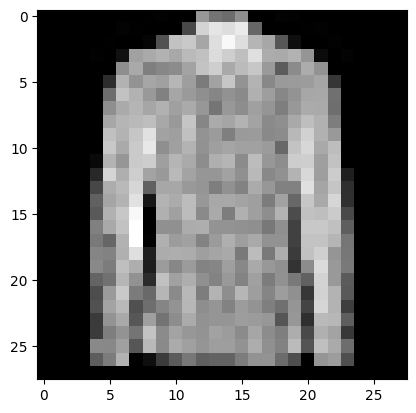

In [11]:
plt.imshow(train_images[112].reshape((28,28)) , cmap = 'gray')

# Etapa 4: Construção do gerador

In [38]:
def make_generator_model():
  model = tf.keras.Sequential() #Creates a sequential Neural Network
  model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,))) # 12544 -> Dense layer
  model.add(layers.BatchNormalization())#Do the normalization of the batch data to avoid the overfitting
  model.add(layers.LeakyReLU()) #Apply the LeakyReLU activation function. Normally, it is used when we work with GANs

  model.add(layers.Reshape((7, 7, 256)))#Reshape the data

  # 7x7x128
  model.add(layers.Conv2DTranspose(128, (5,5), strides=(1,1), padding='same', use_bias=False))#This is a transposed convolutional layer. It performs an operation that is the inverse of a regular convolution. Instead of mapping input pixels to output pixels (as in a regular convolution), it takes a small input and upsamples it to a larger output
  model.add(layers.BatchNormalization())#Do the normalization of the batch data to avoid the overfitting
  model.add(layers.LeakyReLU())

  # 14x14x64
  model.add(layers.Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', use_bias=False))#This is a transposed convolutional layer. It performs an operation that is the inverse of a regular convolution. Instead of mapping input pixels to output pixels (as in a regular convolution), it takes a small input and upsamples it to a larger output
  model.add(layers.BatchNormalization())#Do the normalization of the batch data to avoid the overfitting
  model.add(layers.LeakyReLU())#Apply the LeakyReLU activation function. Normally, it is used when we work with GANs

  # 28x28x1
  model.add(layers.Conv2DTranspose(1, (5,5), strides=(2,2), padding='same', use_bias=False, activation='tanh'))#This is a transposed convolutional layer. It performs an operation that is the inverse of a regular convolution. Instead of mapping input pixels to output pixels (as in a regular convolution), it takes a small input and upsamples it to a larger output

  model.summary()

  return model

In [39]:
noise = tf.random.normal([1, 100]) #Create a random noise

In [40]:
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 1.6981517 , -1.5454235 ,  0.49650976,  0.0338873 , -0.39808294,
         0.90569127,  0.02834949,  0.949292  , -0.79247427, -0.84371215,
         0.9639942 , -1.0604978 , -0.6625822 , -0.03754833,  0.41707727,
        -0.58099186, -1.1800092 , -0.45256844, -1.1053286 ,  1.5150189 ,
         1.5696089 ,  0.9316335 , -0.77044946, -1.6768794 , -1.971262  ,
         0.5333222 ,  1.88438   ,  0.19034341, -0.72493386,  1.4884502 ,
        -0.5393033 ,  0.95135415, -0.42821312,  0.06984072,  1.9301528 ,
        -1.002483  ,  0.06830701,  1.1153142 , -0.3042252 , -1.321527  ,
         0.6612138 ,  0.29893824,  0.83751893,  0.09905411,  0.49744642,
        -0.10458753, -0.2783361 ,  0.03869085,  0.40471357,  2.1386204 ,
         1.0782259 , -0.6763289 , -1.4497073 , -0.314734  ,  0.7235998 ,
        -0.30462086,  1.2356293 ,  0.4567035 , -1.145278  , -0.03564305,
        -2.435873  ,  0.958748  ,  0.44830316, -0.07102106,  0.8643233 ,
 

In [41]:
generator = make_generator_model() #Create the generator model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12544)             1254400   
                                                                 
 batch_normalization_3 (Bat  (None, 12544)             50176     
 chNormalization)                                                
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 12544)             0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_3 (Conv2D  (None, 7, 7, 128)         819200    
 Transpose)                                                      
                                                                 
 batch_normalization_4 (Bat  (None, 7, 7, 128)        

In [42]:
generated_image = generator(noise, training = False) #Try generate a image with then noise

In [43]:
generated_image.shape #Result format

TensorShape([1, 28, 28, 1])

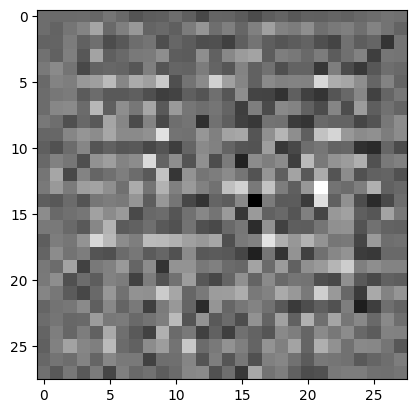

In [44]:
plt.imshow(generated_image[0,:,:,0], cmap='gray') #Show the result

# Etapa 5: Construção do discriminador

In [45]:
def make_discrimator_model():
  model = tf.keras.Sequential()
  # 14x14x64
  model.add(layers.Conv2D(64, (5,5), strides = (2,2), padding='same', input_shape=[28,28,1])) #Add a convolutional layer
  model.add(layers.LeakyReLU())#Apply the LeakyReLU activation function. Normally, it is used when we work with GANs
  model.add(layers.Dropout(0.3))#Apply a dropout in the neurons to avoid overfitting

  # 7x7x128
  model.add(layers.Conv2D(128, (5,5), strides = (2,2), padding='same'))
  model.add(layers.LeakyReLU())#Apply the LeakyReLU activation function. Normally, it is used when we work with GANs
  model.add(layers.Dropout(0.3))#Apply a dropout in the neurons to avoid overfitting

  # 6272
  model.add(layers.Flatten())# Apply the Flattening
  model.add(layers.Dense(1))#One unique neuron that will say if the data is true or false

  model.summary()

  return model

In [46]:
discriminator = make_discrimator_model() #Creates the discriminator neural network

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)             

In [47]:
decision = discriminator(generated_image, training = False) #Try predict the first image generated by the generator before the training
decision

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00640438]], dtype=float32)>

# Etapa 6: Loss function para as duas redes

In [48]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True) #This represents the binary cross-entropy loss function, commonly used in binary classification problems

In [49]:
def discriminator_loss(real_output, fake_output):
  #It compares the real_output porcentage value with the value 1
  real_loss = cross_entropy(tf.ones_like(real_output), real_output)# Try calculate the error of the prediction of the real image
  #It compares the fake_output porcentage value with the value 0
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)# Try calculate the error of the prediction of the fake image
  total_loss = real_loss + fake_loss #Plus both values
  return total_loss

In [50]:
def generator_loss(fake_output):
  #It compares the fake_output porcentage value with the value 1
  return cross_entropy(tf.ones_like(fake_output), fake_output)# Try calculate the error of the prediction of the fake image

In [51]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4) # 0.00001 => learning_rate=learning_step
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4) # 0.00001 => learning_rate=learning_step

In [52]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt') #/training_checkpoints/ckpt/

#Prepare the training function
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

# Etapa 7: Treinamento do modelo

In [53]:
epochs = 100#Epochs value
noise_dim = 100 # Amount of random values will be received in the Input Neural network
num_examples_to_generate = 16 #Numbers of examples to generate

In [54]:
seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

In [55]:
batch_size

256

In [63]:
@tf.function
def train_steps(real_image):
  noise = tf.random.normal([batch_size, noise_dim])#generate a noise
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    # Chamar o gerador e passar os números aleatórios
    generated_fake_images = generator(noise, training = True)

    # Passar para o discriminador as imagens reais e falsas para fazer a classificação
    real_output = discriminator(real_image, training = True)
    fake_output = discriminator(generated_fake_images, training = True)

    # Calcular a loss para o gerador e discriminador
    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)

  # Calcular o gradiente das losses para atualizar os pesos
  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  # Aplicar os otimizadores e atualizar os pesos
  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [61]:
def train(dataset, epochs):#Receive the dataset and the amount of epochs for training
  for epoch in range(epochs):#For each epoch in the epochs
    start = time.time()#Start the timer

    for image_batch in dataset:#for each batch in the dataset
      train_steps(image_batch)#Train the Neural Network

    display.clear_output(wait = True)#Clear the terminal
    generate_and_save_images(generator, epoch + 1, seed)#Generate and save the images

    if (epoch + 1) % 15 == 0:#In each 15 epochs
      checkpoint.save(file_prefix=checkpoint_prefix)#Save a training checkpoint

    print('Time for epoch {} is {} sec'.format(epoch + 1, time.time() - start))#Show the time

  display.clear_output(wait = True)#Clear the terminal
  generate_and_save_images(generator, epoch + 1, seed)#generate and save the image

In [62]:
def generate_and_save_images(model, epoch, test_input):#Function to generate and save the images
  predictions = model(test_input, training = False) #Try generate the image

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
    plt.axis('off')
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [65]:
train(train_dataset, epochs)

KeyboardInterrupt: ignored

In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [ ]:
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

In [ ]:
display_image(60)